# Data Analytics Project: Bike-Sharing Dataset
- **Nama:** Irmaya Salsabila
- **Email:** irmayasalsabila29@gmail.com
- **ID Dicoding:** irmaya02

## Define Business Questions
1. Berapa perbandingan antara jumlah pelanggan sepeda casual dan pelanggan terdaftar?
2. Pada pukul berapa jumlah pelanggan sepeda paling banyak dan paling sedikit?
3. Apakah workingday memengaruhi jumlah pelanggan yang menyewa sepeda?
4. Bagaimana tren perkembangan jumlah pelanggan sepeda dalam kurun waktu dua tahun terakhir?

## Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Load the Bike-sharing Hour dataset

In [3]:
bike_hour_df = pd.read_csv("https://raw.githubusercontent.com/Irmaya02/Bike-Sharing-Analysis-Project/main/Bike-sharing-dataset/hour.csv")
bike_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Assessing Bike-sharing Data by Hour

In [4]:
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
bike_hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah data pada bike_hour_df lengkap, tidak terbadapt missing value.

In [6]:
print("Duplicates data: ", bike_hour_df.duplicated().sum())

Duplicates data:  0


Pada dataset bike_hour_df tidak terdapat duplikasi data.

In [7]:
bike_hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Convert the data type of 'dteday' in the 'bike_hour_df' dataset from object to datetime

In [8]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    bike_hour_df[column] = pd.to_datetime(bike_hour_df[column])

Convert some data types to category

In [9]:
bike_hour_df['season'] = bike_hour_df.season.astype('category')
bike_hour_df['yr'] = bike_hour_df.yr.astype('category')
bike_hour_df['mnth'] = bike_hour_df.mnth.astype('category')
bike_hour_df['holiday'] = bike_hour_df.holiday.astype('category')
bike_hour_df['weekday'] = bike_hour_df.weekday.astype('category')
bike_hour_df['workingday'] =bike_hour_df.workingday.astype('category')
bike_hour_df['weathersit'] = bike_hour_df.weathersit.astype('category')

In [10]:
print(bike_hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Changed some column header names to make it easier to understand

In [11]:
bike_hour_df.rename(
    columns={
        "instant": "id_data",
        "dteday": "dateday",
        "hr": "hour",
        "yr": "year",
        "mnth": "month",
        "hum": "humidity",
        "weathersit": "weather",
        "cnt": "count",
    },
    inplace=True,
)

bike_hour_df.head()

,id_data,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Change the numeric values in the categorical columns to strings to simplify the analysis process

In [12]:
bike_hour_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)
bike_hour_df['year'].replace({0: '2011', 1: '2012'}, inplace=True)
bike_hour_df['month'] = bike_hour_df['month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
bike_hour_df['holiday'] = bike_hour_df['holiday'].replace({0: 'No', 1: 'Yes'})
bike_hour_df['weekday'] = bike_hour_df['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
bike_hour_df['workingday'] = bike_hour_df['workingday'].replace({0: 'No', 1: 'Yes'})
bike_hour_df['weather'] = bike_hour_df['weather'].replace({1: "Clear", 2: "Mist", 3: "Light Snow/Rain", 4: "Heavy Rain/Snow"
})
print(bike_hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_data     17379 non-null  int64         
 1   dateday     17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  category      
 4   month       17379 non-null  category      
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weather     17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

Normalize the values in the columns temp, atemp, hum, and windspeed

In [13]:
# Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
bike_hour_df["temp"] = bike_hour_df["temp"] * 41

# Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
bike_hour_df["atemp"] = bike_hour_df["atemp"] * 50

#Normalized humidity. The values are divided to 100 (max)
bike_hour_df["humidity"] = bike_hour_df["humidity"] * 100

# Normalized wind speed. The values are divided to 67 (max)
bike_hour_df["windspeed"] = bike_hour_df["windspeed"] * 67

bike_hour_df.head()
     

,id_data,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,No,Saturday,No,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,No,Saturday,No,Clear,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,No,Saturday,No,Clear,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,No,Saturday,No,Clear,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,No,Saturday,No,Clear,9.84,14.395,75.0,0.0,0,1,1


Save the cleaned dataset to a CSV file

In [14]:
bike_hour_df.to_csv('bike_hour_clean.csv', index=False)
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_data     17379 non-null  int64         
 1   dateday     17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  category      
 4   month       17379 non-null  category      
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weather     17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

## Exploratory Data Analysis (EDA)

In [15]:
bike_hour_df.describe(include="all")

C:\Users\IRMAYA SALSABILA\AppData\Local\Temp\ipykernel_21972\1608722770.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bike_hour_df.describe(include="all")


,id_data,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,2,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,2012,May,NaN,No,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,8734,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,NaN,NaN,6.914405,NaN,NaN,NaN,NaN,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000


Berdasarkan data tersebut, terlihat bahwa orang-orang cenderung lebih sering menggunakan layanan Bike Sharing pada musim gugur.

### Explore 'bike_hour_df'

In [16]:
bike_hour_df.groupby(by="year").agg({
    "count": ["max", "min", "sum"]
})

count             
       max min      sum
year                   
2011   651   1  1243103
2012   977   1  2049576

Berdasarkan data di atas, jumlah pengguna bike-sharing pada tahun 2011 adalah 1.243.103 orang dan pada tahun 2012 adalah 2.049.576 orang. Hal ini menunjukkan adanya peningkatan.

In [17]:
bike_hour_df.groupby(["year", "month"]).agg({
    "count": "sum"
})

count
year month            
2011 January     38189
     February    48215
     March       64045
     April       94870
     May        135821
     June       143512
     July       141341
     August     136691
     September  127418
     October    123511
     November   102167
     December    87323
2012 January     96744
     February   103137
     March      164875
     April      174224
     May        195865
     June       202830
     July       203607
     August     214503
     September  218573
     October    198841
     November   152664
     December   123713

Pelanggan terbanyak pada tahun 2011 pada bulan Juni (143512 orang) sedangkan tahun 2012 pada bulan September (218573 orang).

In [18]:
bike_hour_df.groupby(by="year").agg({
    "casual": ["max", "min", "mean", "std", "sum"],
    "registered": ["max", "min", "mean", "std", "sum"],
    "count": ["max", "min", "mean", "std", "sum"]
})

casual                                   registered                  \
        max min       mean        std     sum        max min        mean   
year                                                                       
2011    272   0  28.600578  38.840789  247252        567   0  115.193869   
2012    367   0  42.679757  56.970413  372765        886   0  191.986604   

                          count                                       
             std      sum   max min        mean         std      sum  
year                                                                  
2011  109.461014   995851   651   1  143.794448  133.797854  1243103  
2012  175.481637  1676811   977   1  234.666361  208.910941  2049576

Pelanggan registerted pada tahun 2011 dan 2012 lebih banyak daripada pelanggan casual.

C:\Users\IRMAYA SALSABILA\AppData\Local\Temp\ipykernel_21972\550972339.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="month", y=columns[i], data=bike_hour_df, ax=ax, estimator=sum, ci=None, color="#16355F")
C:\Users\IRMAYA SALSABILA\AppData\Local\Temp\ipykernel_21972\550972339.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="month", y=columns[i], data=bike_hour_df, ax=ax, estimator=sum, ci=None, color="#16355F")
C:\Users\IRMAYA SALSABILA\AppData\Local\Temp\ipykernel_21972\550972339.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="month", y=columns[i], data=bike_hour_df, ax=ax, estimator=sum, ci=None, color="#16355F")


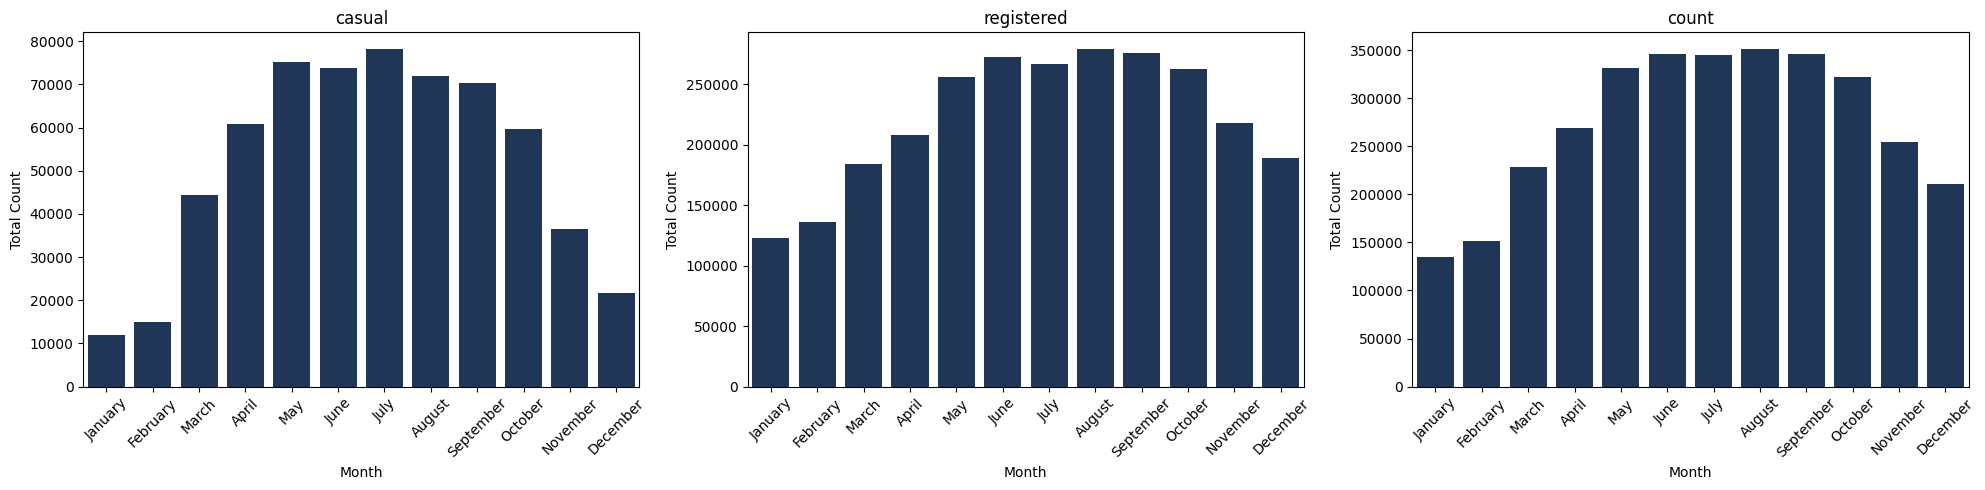

In [19]:
# Columns to plot
columns = ["casual", "registered", "count"]

# Create a figure with 3 subplots, each representing a bar chart for one of the columns
fig, ax = plt.subplots(1, 3, figsize=(20,5))  

# Loop through each subplot and plot the bar chart
for i, ax in enumerate(ax):
    sns.barplot(x="month", y=columns[i], data=bike_hour_df, ax=ax, estimator=sum, ci=None, color="#16355F")  
    ax.set_title(columns[i])
    ax.set_xlabel("Month")
    ax.set_ylabel("Total Count")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()


Grafik di atas adalah distribusi jumlah pelanggan registered dan casual per bulan.

In [20]:
# melihat distribusi penyewa sepeda berdasarkan jenis musim
bike_hour_df.groupby(by="season").agg({
    "count": ["max", "min", "mean", "std", "sum"]
})

count                                     
         max min        mean         std      sum
season                                           
Spring   801   1  111.114569  119.224010   471348
Summer   957   1  208.344069  188.362473   918589
Fall     977   1  236.016237  197.711630  1061129
Winter   967   1  198.868856  182.967972   841613

Musim Fall memiliki jumlah pelanggan bike-sharing terbanyak (1061129).

In [21]:
bike_hour_df.groupby(by="weather").agg({
    "count": ["max", "min", "mean", "std", "sum"]
}).sort_values(by="weather", ascending=True)

count                                     
                  max min        mean         std      sum
weather                                                   
Clear             977   1  204.869272  189.487773  2338173
Mist              957   1  175.165493  165.431589   795952
Light Snow/Rain   891   1  111.579281  133.781045   158331
Heavy Rain/Snow   164  23   74.333333   77.925178      223

Jumlah pelanggan pelanggan bike-sharing terbanyak saat cuaca clear (2338173) sedangkan yang paling sedikit saat cuaca Heavy Rain/Snow (223).

In [22]:
bike_hour_df.groupby(by="hour").agg({
    "count": ["max", "min", "mean", "std", "sum"]
})

count                                    
       max min        mean         std     sum
hour                                          
0      283   2   53.898072   42.307910   39130
1      168   1   33.375691   33.538727   24164
2      132   1   22.869930   26.578642   16352
3       79   1   11.727403   13.239190    8174
4       28   1    6.352941    4.143818    4428
5       66   1   19.889819   13.200765   14261
6      213   1   76.044138   55.084348   55132
7      596   1  212.064649  161.441936  154171
8      839   5  359.011004  235.189285  261001
9      426  14  219.309491   93.703458  159438
10     539   8  173.668501  102.205413  126257
11     663  10  208.143054  127.495536  151320
12     776   3  253.315934  145.081134  184414
13     760  11  253.661180  148.107657  184919
14     750  12  240.949246  147.271574  175652
15     750   7  251.233196  144.632541  183149
16     783  11  311.983562  148.682618  227748
17     976  15  461.452055  232.656611  336860
18     977  23  425.510989  224.639304  309772
19     743  11  311.523352  161.050359  226789
20     567  11  226.030220  119.670164  164550
21     584   6  172.314560   89.788893  125445
22     502   9  131.335165   69.937782   95612
23     256   2   87.831044   50.846889   63941

Jumlah pelanggan pelanggan bike-sharing terbanyak pada jam 17 sore (336860) dan jam 8 pagi (261001), sedangkan paling sedikit pada jam 4 pagi (4428).

In [23]:
bike_hour_df.groupby(by="workingday").agg({
    "id_data": "nunique",
    "count": ["sum"]
})

,id_data,count
,nunique,sum
workingday,,
No,5514,1000269
Yes,11865,2292410


Pelanggan bike-sharing lebih lebih banyak saat working day (2292410).

In [24]:
bike_hour_df.groupby(by="holiday").agg({
    "id_data": "nunique",
    "count": ["sum"]
})

,id_data,count
,nunique,sum
holiday,,
No,16879,3214244
Yes,500,78435


Saat holiday pelanggang bike-sharing hanya sekitar 78435 orang.

In [31]:
bike_hour_df.groupby(by="weekday").agg({
    "dateday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "count": ["max", "min", "mean", "sum"]
})

dateday  casual registered count                        
          nunique     sum        sum   max min        mean     sum
weekday                                                           
Sunday        105  140521     303506   776   1  177.468825  444027
Monday        105   70784     384719   968   1  183.744655  455503
Tuesday       104   57843     411266   970   1  191.238891  469109
Wednesday     104   57319     415729   977   1  191.130505  473048
Thursday      104   61460     423935   976   1  196.436665  485395
Friday        104   78238     409552   957   1  196.135907  487790
Saturday      105  153852     323955   783   1  190.209793  477807

Berdasarkan data di atas, pelanggan bike-sharing banyak melakukan sewa sepeda pada hari Jumat (487790).

In [ ]:
bike_hour_df.groupby(["year", "month"]).agg({
    "temp": ["max", "min", "mean"],
    "atemp": ["max", "min", "mean"],
    "humidity": ["max", "min", "mean"],
    "windspeed": ["max", "min", "mean"],
    "count": ["max", "min", "mean"]
})

temp                     atemp                    humidity  \
                  max    min       mean     max     min       mean      max   
year month                                                                    
2011 January    18.86   0.82   8.093924  22.725   0.000  10.187892    100.0   
     February   27.06   2.46  11.642989  31.060   3.790  14.286479    100.0   
     March      28.70   4.92  13.580548  31.820   4.545  16.243959    100.0   
     April      31.16   9.84  19.311627  33.335  11.365  22.831203    100.0   
     May        36.90  13.94  23.666478  41.665  15.150  27.540679    100.0   
     June       38.54  19.68  28.416417  43.940  23.485  32.327972    100.0   
     July       39.36  23.78  31.101586  50.000  27.275  35.533011     94.0   
     August     37.72  21.32  28.927715  42.425  25.000  32.782476     94.0   
     September  32.80  15.58  25.129512  38.635  19.695  28.429554    100.0   
     October    30.34   9.02  19.265034  32.575   9.850  22.935101    100.0   
     November   26.24   8.20  16.490097  31.060  10.605  19.959812    100.0   
     December   21.32   5.74  13.336896  25.000   7.575  16.501613    100.0   
2012 January    23.78   0.82  11.275277  27.275   0.760  13.747686    100.0   
     February   25.42   3.28  12.932775  31.060   2.275  15.729321    100.0   
     March      29.52   6.56  18.430686  32.575   8.335  21.935720    100.0   
     April      32.80  11.48  19.230028  34.850  13.635  22.879791     94.0   
     May        33.62  17.22  25.106989  39.395  21.210  29.025517     94.0   
     June       40.18  18.86  27.679556  46.210  22.725  31.496597     94.0   
     July       41.00  23.78  30.846989  45.455  27.275  34.876378     94.0   
     August     36.90  22.96  29.183844  42.425  12.120  32.376720     94.0   
     September  35.26  17.22  25.423417  39.395  21.210  29.502653     94.0   
     October    30.34  12.30  20.718898  34.090  13.635  24.493757    100.0   
     November   24.60   8.20  13.782396  31.060   9.850  16.771866     93.0   
     December   24.60   5.74  13.244879  31.060   7.575  16.128228    100.0   

                                windspeed                 count      \
                 min       mean       max  min       mean   max min   
year month                                                            
2011 January    21.0  57.405523   39.0007  0.0  13.231497   249   1   
     February    8.0  55.970724   54.0020  0.0  15.373238   327   1   
     March       0.0  57.005479   43.0006  0.0  15.559098   336   1   
     April      22.0  66.821975   40.9973  0.0  16.355017   530   1   
     May        24.0  71.336022   40.9973  0.0  12.145371   611   1   
     June       20.0  59.325000   35.0008  0.0  11.939093   638   1   
     July       16.0  58.966398   56.9969  0.0  11.501721   596   1   
     August     25.0  62.562244   55.9986  0.0  12.603497   651   1   
     September  41.0  78.382148   40.9973  0.0  10.234722   628   1   
     October    29.0  70.654105   39.0007  0.0  11.764830   625   1   
     November   27.0  67.521558   36.9974  0.0  12.126991   553   1   
     December   26.0  64.952767   43.0006  0.0  11.242012   477   1   
2012 January    21.0  58.731444   43.9989  0.0  14.532092   559   1   
     February   22.0  57.424855   54.0020  0.0  13.621739   610   1   
     March      16.0  60.771198   46.0022  0.0  14.269539   957   1   
     April      16.0  50.789694   47.9988  0.0  15.043385   822   1   
     May        21.0  66.455645   39.0007  0.0  12.375134   873   1   
     June       20.0  55.836111   39.0007  0.0  12.907178   900   4   
     July       19.0  60.608871   40.9973  0.0  10.750168   913   2   
     August     25.0  64.862903   35.0008  0.0  10.392763   941   3   
     September  28.0  64.537500   43.0006  0.0  11.986356   977   3   
     October    27.0  67.159605   39.0007  0.0  11.260164   963   1   
     November   16.0  57.480501   43.0006  0.0  12.497618   729   1   
     December   31.0  68.268194   43.

## Visualization & Explanatory Analysis

Pertanyaan 1: Berapa perbandingan antara jumlah pelanggan sepeda casual dan pelanggan terdaftar?

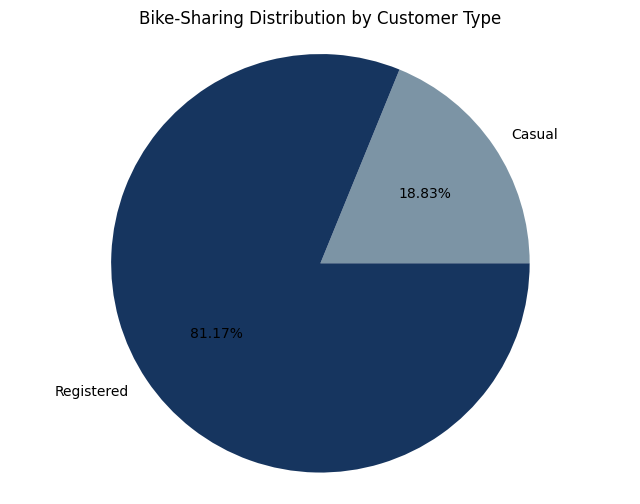

In [ ]:
total_casual = bike_hour_df["casual"].sum()
total_registered = bike_hour_df["registered"].sum()

labels = ["Casual", "Registered"]
sizes = [total_casual, total_registered]
colors = ["#7C94A5", "#16355F"]

# Plot Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.2f%%")
plt.title("Bike-Sharing Distribution by Customer Type")
plt.axis("equal")

# Menampilkan pie chart
plt.show()

Berdasarkan data di atas, sebagian besar pengguna layanan bike-sharing adalah pelanggan registered yaitu mencapai 81.17%, sementara 18.83% sisanya adalah pelanggan casual.

Pertanyaa 2: Pada pukul berapa jumlah pelanggan sepeda paling banyak dan paling sedikit?

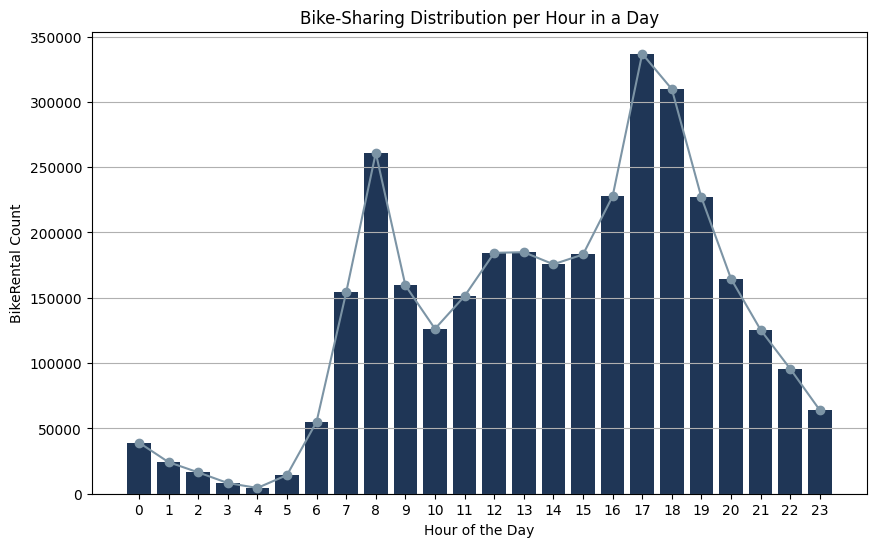

In [ ]:
# Menghitung jumlah pelanggan pada setiap jam
hourly_counts = bike_hour_df.groupby('hour')['count'].sum().reset_index()

# Plot barplot
colors = ["#16355F"]
plt.figure(figsize=(10, 6))
sns.barplot(x="hour", y="count", data=hourly_counts, palette=colors)
plt.plot(hourly_counts["hour"], hourly_counts["count"], color="#7C94A5", marker="o", linestyle="-")
plt.title("Bike-Sharing Distribution per Hour in a Day")
plt.xlabel("Hour of the Day")
plt.ylabel("BikeRental Count")
plt.grid(True, axis="y")
plt.show()


Grafik menunjukkan bahwa sebagian besar pelanggan bike-sharing menyewa sepeda pada pukul 8 pagi dan antara pukul 17-18 sore. Hal ini mungkin terjadi karena pada jam tersebut orang-orang mulai beraktivitas atau berangkat kerja sekitar pukul 8 pagi dan pulang kerja sekitar pukul 17-18 sore. Sementara itu, jumlah penyewaan paling sedikit terjadi pada pukul 4 pagi.

Pertanyaan 3: Apakah workday memengaruhi jumlah pelanggan yang menyewa sepeda?

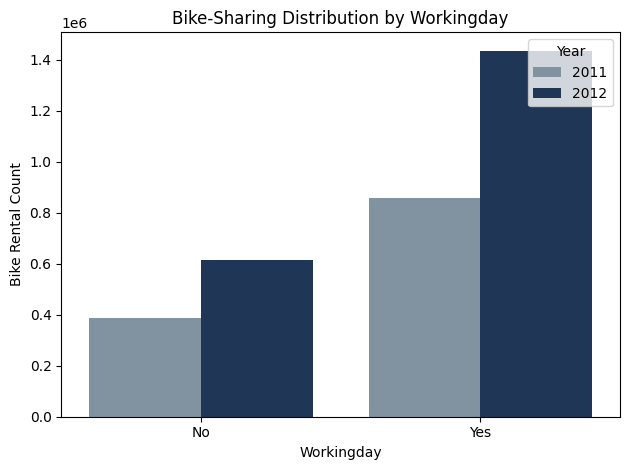

In [ ]:
working_counts = bike_hour_df.groupby(by=["workingday","year"]).agg({
    "count": "sum"
}).reset_index()  

colors = ["#7C94A5", "#16355F"]
sns.barplot(data=working_counts, x="workingday", y="count", hue="year", palette=colors)
plt.ylabel("Bike Rental Count")
plt.xlabel("Workingday")
plt.title("Bike-Sharing Distribution by Workingday")
plt.legend(title="Year", loc="upper right")  
plt.tight_layout()
plt.show()


Grafik menunjukkan bahwa jumlah pelanggan yang menyewa sepeda cenderung lebih tinggi pada hari kerja (workingday) dibandingkan dengan hari libur, baik pada tahun 2011 maupun 2012. Hal ini menunjukkan adanya pengaruh dari hari kerja terhadap tingkat permintaan penyewaan sepeda.

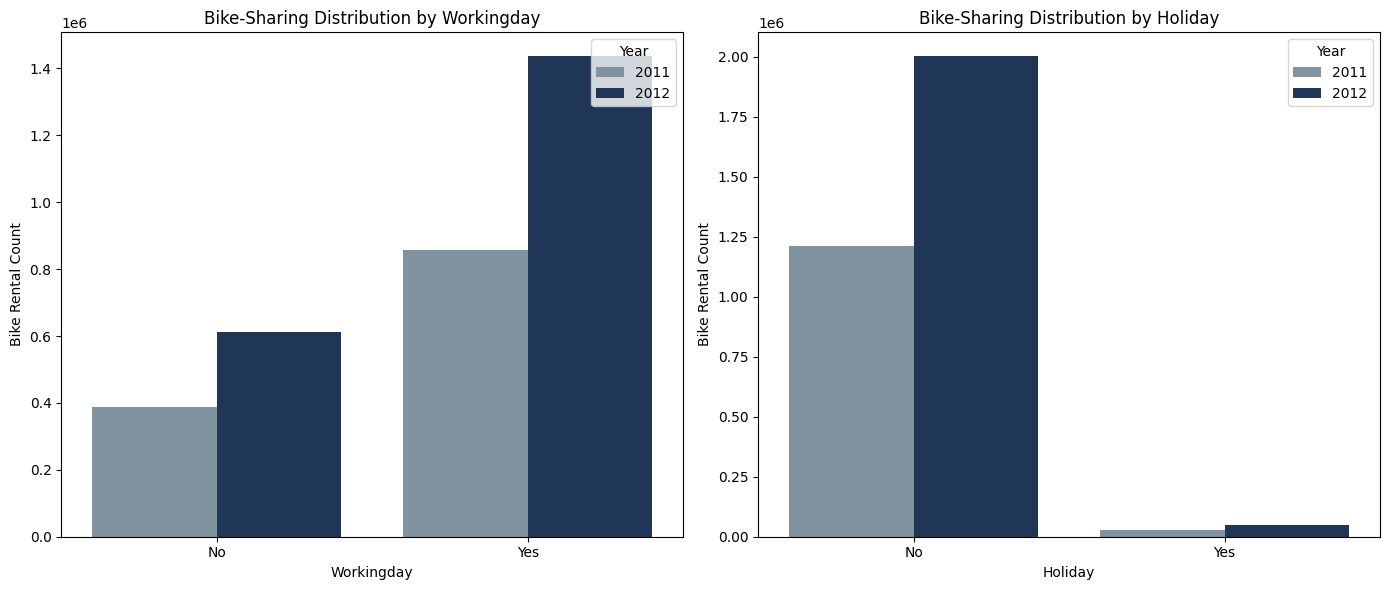

In [ ]:
# Group data by 'workingday' and 'year', and aggregate the 'count' column by sum
working_counts = bike_hour_df.groupby(by=["workingday", "year"]).agg({"count": "sum"}).reset_index()

# Group data by 'holiday' and 'year', and aggregate the 'count' column by sum
holiday_counts = bike_hour_df.groupby(by=["holiday", "year"]).agg({"count": "sum"}).reset_index()

# Set up the figure and axis
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Specify the colors for the bars
colors = ["#7C94A5", "#16355F"]

# Plot the barplot for workingday
sns.barplot(data=working_counts, x="workingday", y="count", hue="year", palette=colors, ax=axes[0])
axes[0].set_ylabel("Bike Rental Count")
axes[0].set_xlabel("Workingday")
axes[0].set_title("Bike-Sharing Distribution by Workingday")
axes[0].legend(title="Year", loc="upper right")  

# Plot the barplot for holiday
sns.barplot(data=holiday_counts, x="holiday", y="count", hue="year", palette=colors, ax=axes[1])
axes[1].set_ylabel("Bike Rental Count")
axes[1].set_xlabel("Holiday")
axes[1].set_title("Bike-Sharing Distribution by Holiday")
axes[1].legend(title="Year", loc="upper right")  

plt.tight_layout()
plt.show()


Grafik diatas menunjukan jumlah pengguna bike-sharing pada saat workingday dan holiday.

Pertanyaan 4: Bagaimana tren perkembangan jumlah pelanggan sepeda dalam kurun waktu dua tahun terakhir?

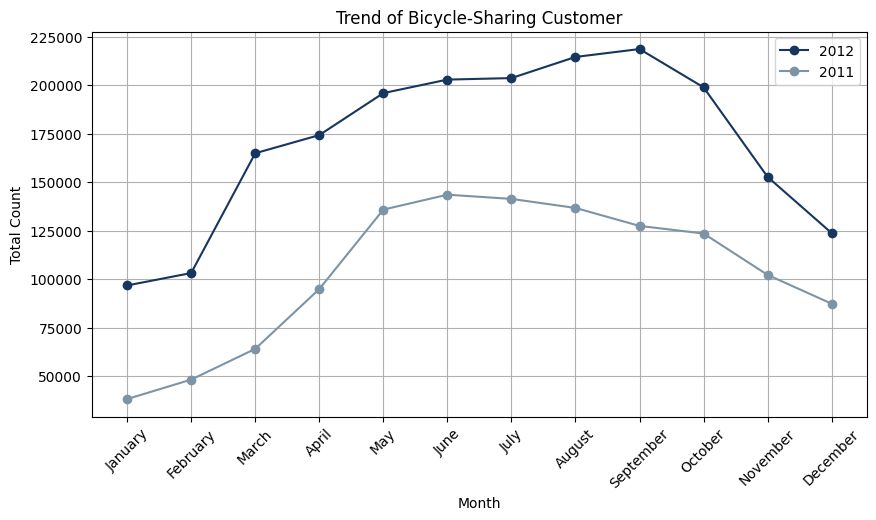

In [ ]:
bike_hour_df["year"] = bike_hour_df["year"].astype("Int64")

# Filter data untuk tahun 2011
data_2011 = bike_hour_df[bike_hour_df["year"] == 2011]
monthly_count_2011 = data_2011.groupby("month")["count"].sum()

# Filter data untuk tahun 2012
data_2012 = bike_hour_df[bike_hour_df["year"] == 2012]
monthly_count_2012 = data_2012.groupby("month")["count"].sum()

# Plot Line Chart
plt.figure(figsize=(10, 5))
plt.plot(monthly_count_2012.index, monthly_count_2012.values, marker="o", linestyle="-", color="#16355F", label="2012")
plt.plot(monthly_count_2011.index, monthly_count_2011.values, marker="o", linestyle="-", color="#7C94A5", label="2011")
plt.xlabel("Month")
plt.ylabel("Total Count")
plt.title("Trend of Bicycle-Sharing Customer")
plt.xticks(range(0, 12), ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Jumlah pelanggan bike-sharing fluktuatif sepanjang tahun. Pada tahun 2011, bulan Juni menjadi puncaknya, sedangkan pada tahun 2012 adalah bulan September. Namun, terjadi penurunan pada akhir tahun di kedua tahun tersebut. Hal ini mungkin terkait dengan faktor musim atau cuaca pada bulan-bulan tersebut. Secara konsisten, jumlah pelanggan pada tahun 2012 lebih tinggi daripada tahun 2011.

### RFM Analysis

In [ ]:
rfm_df = bike_hour_df.groupby(by="registered", as_index=False).agg({
    "id_data": "count", #frequency
    "count": "max", #monetary
    "dateday": lambda x: (pd.Timestamp.now() - x.max()).days #recency
})

rfm_df.columns = ["registered", "frequency", "monetary", "recency"]
rfm_df.head()

,registered,frequency,monetary,recency
0,0,24,4,4119
1,1,201,7,4081
2,2,245,16,4082
3,3,294,14,4081
4,4,307,21,4084


In [ ]:
rfm_df = rfm_df.sort_values(by='monetary', ascending=False)
rfm_df.head()

,registered,frequency,monetary,recency
775,886,1,977,4191
774,885,1,976,4183
755,802,1,970,4192
770,857,2,968,4163
771,860,1,967,4178


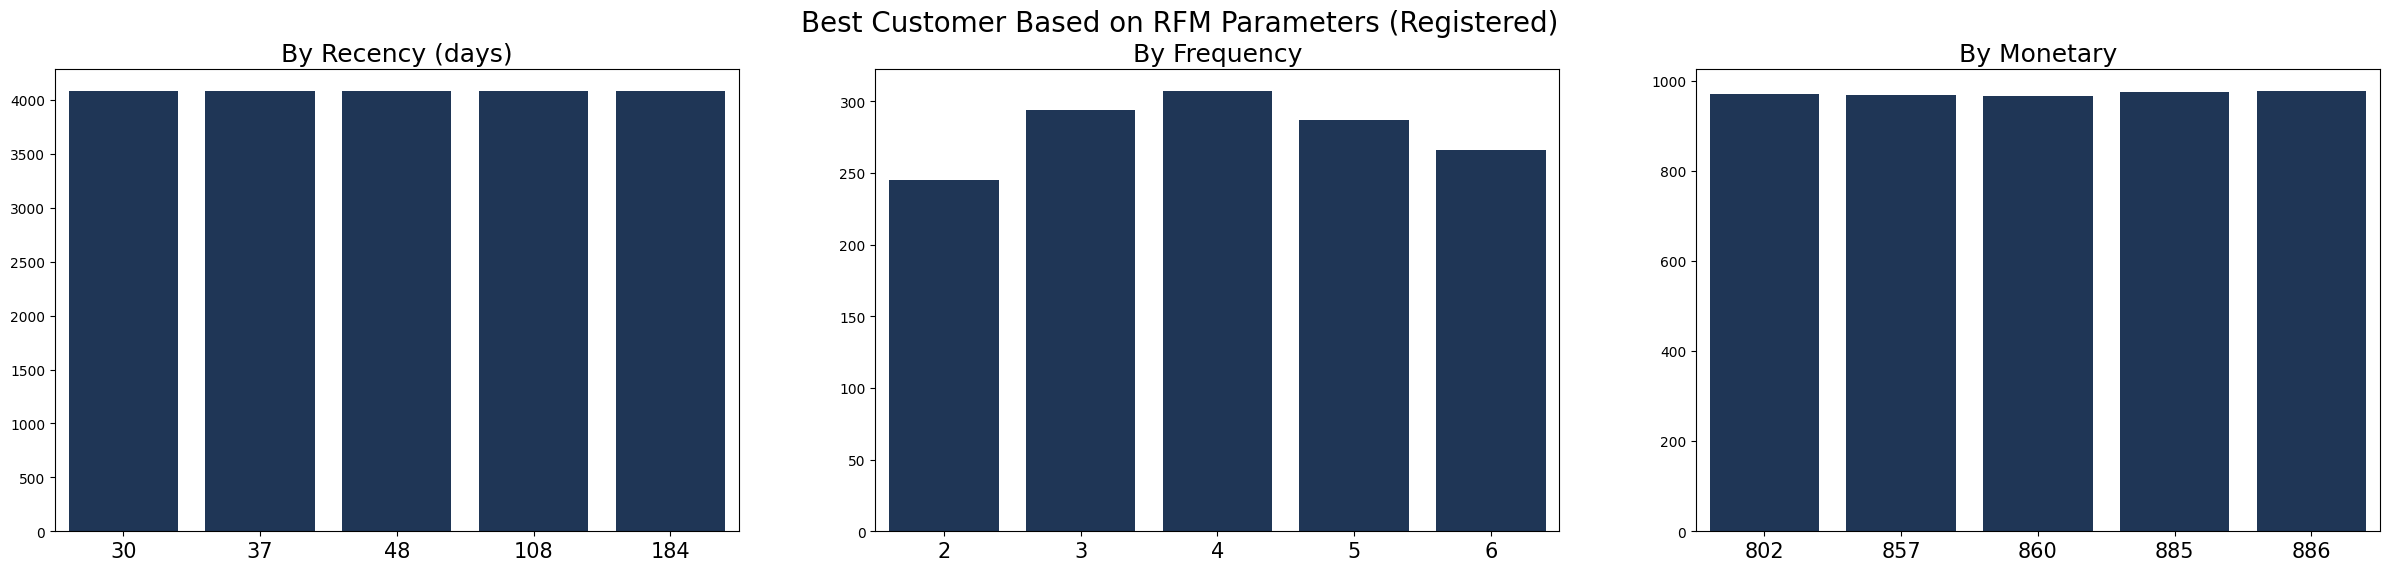

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#16355F", "#16355F", "#16355F", "#16355F", "#16355F"]

sns.barplot(y="recency", x="registered", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="registered", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="registered", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (Registered)", fontsize=20)
plt.show()

Grafik menunjukkan analisis RFM dari lima pelanggan registered dengan tingkat sewa sepeda tertinggi.

In [ ]:
rfm_df = bike_hour_df.groupby(by="casual", as_index=False).agg({
    "id_data": "count", #frequency
    "count": "max", #monetary
    "dateday": lambda x: (pd.Timestamp.now() - x.max()).days #recency
})

rfm_df.columns = ["casual", "frequency", "monetary", "recency"]
rfm_df.head()

,casual,frequency,monetary,recency
0,0,1581,300,4081
1,1,1082,448,4082
2,2,798,365,4081
3,3,697,513,4081
4,4,561,520,4081


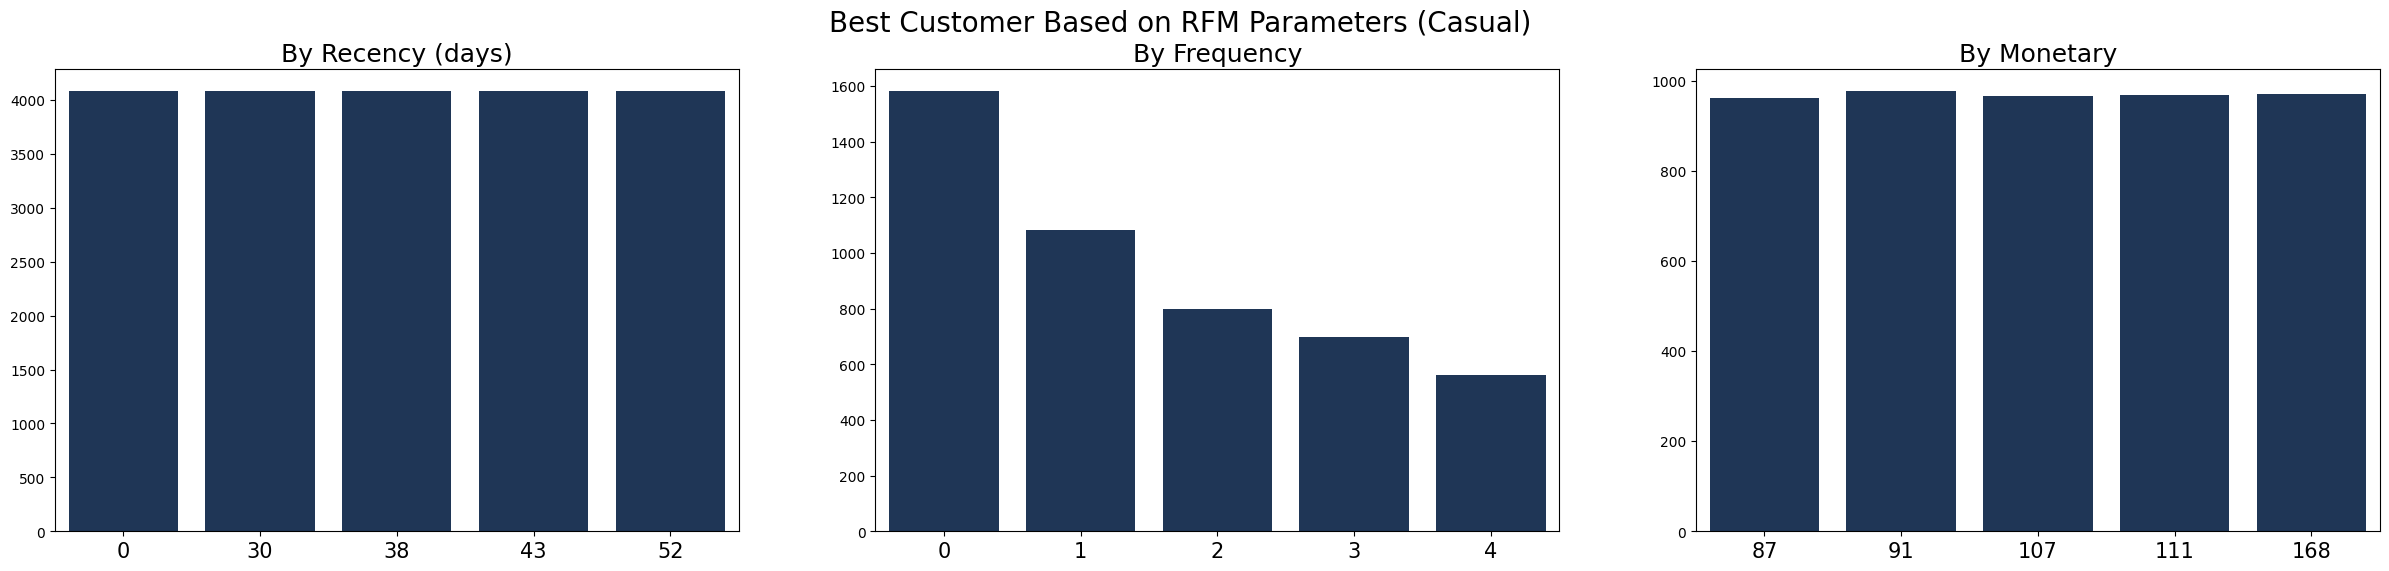

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#16355F", "#16355F", "#16355F", "#16355F", "#16355F"]

sns.barplot(y="recency", x="casual", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="casual", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="casual", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (Casual)", fontsize=20)
plt.show()


Grafik menunjukkan analisis RFM dari lima pelanggan casual dengan tingkat sewa sepeda tertinggi.

## Conclusion

1. Mayoritas pengguna layanan bike-sharing adalah pelanggan terdaftar (registered 81.17%), sedangkan sisanya adalah pelanggan casual.
2. Pada pukul 8 pagi dan antara pukul 17-18 sore merupakan waktu dengan jumlah pelanggan sepeda paling banyak. Sementara itu, jumlah penyewaan paling sedikit terjadi pada pukul 4 pagi.
3. Jumlah pelanggan bike-sharing lebih tinggi pada hari kerja daripada hari libur.
4. Jumlah pelanggan fluktuatif sepanjang tahun, dengan jumlah pelanggan tahun 2012 lebih tinggi dari tahun 2011. Puncaknya terjadi pada bulan Juni 2011 dan bulan September 2012.